## Image Classification Using mnist fashion database


Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

Link : https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles


The class labels are:


Label 	    Description


0 	          T-shirt/top


1 	           Trouser


2 	           Pullover


3 	           Dress


4 	            Coat


5 	            Sandal


6 	            Shirt


7 	            Sneaker


8 	            Bag


9 	            Ankle boot

In [8]:
import tensorflow as tf
from tensorflow import keras


In [9]:
# import keras

In [10]:
print(keras.__version__)

2.13.1


In [6]:
tf.__version__

'2.13.0'

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 14s 3us/step


In [12]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

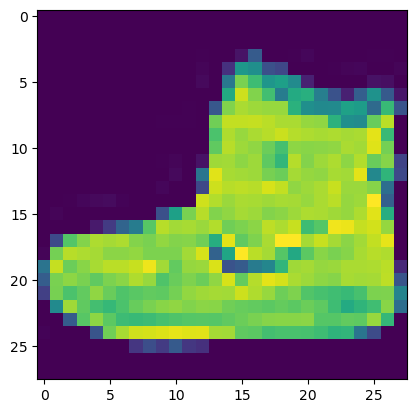

In [15]:
plt.imshow(X_train_full[0])  # access the first element/image

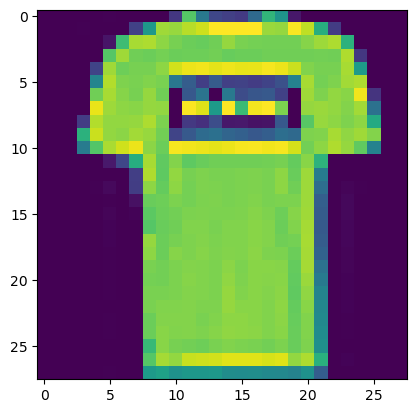

In [16]:
plt.imshow(X_train_full[1])

In [17]:
y_train_full[0]  # the label

9

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
class_names[y_train_full[10]]

'T-shirt/top'

In [20]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

 ### Data Normalization

 Normalize the data dimensions so that they are approximately of the same scale.
 
 

In [21]:
# restrict  the pixel intensities between 0 and 1
X_train_norm = X_train_full/255.
X_test_norm = X_test /255.

### Train/validation/test data split

In [22]:
X_valid, X_train = X_train_norm[:5000], X_train_norm[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_norm

In [23]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Building the Neural Network Structure Using Keras

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
# import image module
from IPython.display import Image
# get the image
Image(url="neural_network.png", width=500, height=300)

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28])) 
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


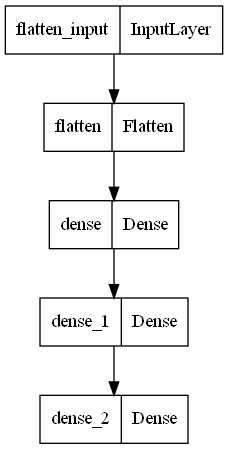

In [30]:
import pydot
keras.utils.plot_model(model)

In [31]:
# access the parameters

weight, biases = model.layers[1].get_weights()

In [32]:
weight

array([[ 0.05768318,  0.02291947,  0.00758144, ..., -0.06054118,
         0.00451013, -0.06349339],
       [-0.02427248,  0.05554877, -0.00525226, ...,  0.03597772,
         0.05956081, -0.07246064],
       [-0.04069188,  0.06658757, -0.06126926, ..., -0.00637981,
         0.0121569 , -0.04615031],
       ...,
       [-0.01766954, -0.00985388,  0.03735785, ..., -0.02859144,
        -0.01735083, -0.0650309 ],
       [ 0.07312933,  0.02126458,  0.03648845, ..., -0.03194866,
        -0.02752078,  0.01902787],
       [-0.06055254, -0.01683031, -0.0263306 , ...,  0.04827823,
        -0.01238391, -0.00816896]], dtype=float32)

In [33]:
weight.shape

(784, 300)

In [36]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Setting up learning processes using compile method.

In [37]:
model.compile(loss ="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics=["accuracy"])

In [39]:
model_history = model.fit(X_train, y_train, epochs=30,
                          validation_data =(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7236 - accuracy: 0.7608 - val_loss: 0.5231 - val_accuracy: 0.8218
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4901 - accuracy: 0.8288 - val_loss: 0.4350 - val_accuracy: 0.8546
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4436 - accuracy: 0.8438 - val_loss: 0.5435 - val_accuracy: 0.7966
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4168 - accuracy: 0.8549 - val_loss: 0.3928 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3983 - accuracy: 0.8607 - val_loss: 0.3784 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3796 - accuracy: 0.8667 - val_loss: 0.3701 - val_accuracy: 0.8750
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3673 - accuracy: 0.8705 - val_loss: 0.3624 - val_accuracy:

In [40]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [41]:
model_history.history

{'loss': [0.7236298322677612,
  0.4901198148727417,
  0.4435855448246002,
  0.4167615473270416,
  0.39829590916633606,
  0.37963515520095825,
  0.3672895133495331,
  0.3557368218898773,
  0.3455778658390045,
  0.3361467123031616,
  0.32776904106140137,
  0.3187863528728485,
  0.31173649430274963,
  0.30535417795181274,
  0.29816052317619324,
  0.29271170496940613,
  0.28748878836631775,
  0.2811766266822815,
  0.2765658497810364,
  0.27102962136268616,
  0.26565226912498474,
  0.2613013982772827,
  0.25664976239204407,
  0.2523305416107178,
  0.24835459887981415,
  0.24389737844467163,
  0.2403557002544403,
  0.23695068061351776,
  0.2323475480079651,
  0.22884562611579895],
 'accuracy': [0.7608363628387451,
  0.8288000226020813,
  0.8438000082969666,
  0.8548545241355896,
  0.8607090711593628,
  0.8667272925376892,
  0.8704727292060852,
  0.8729454278945923,
  0.8781272768974304,
  0.8806545734405518,
  0.8831818103790283,
  0.8855999708175659,
  0.8882727026939392,
  0.88985455036163

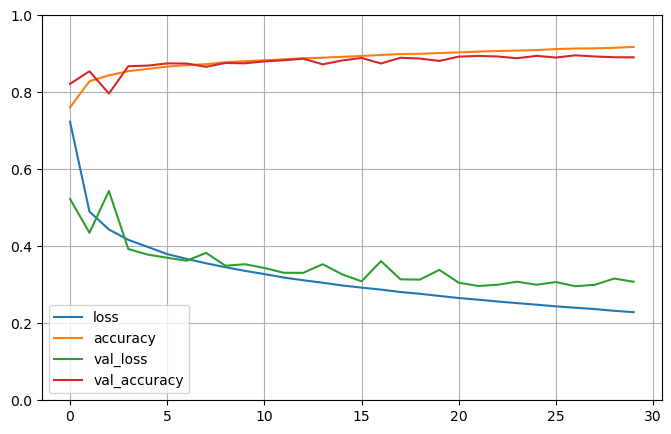

In [42]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Evaluate model performance